In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pygame as pg
from sklearn import svm

pygame 2.0.0 (SDL 2.0.12, python 3.7.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [43]:
data = []
cluster = []
pg.init()
WHITE = (255, 255, 255)
BLUE = (0, 0, 225)
sc = pg.display.set_mode((400, 300))
sc.fill(WHITE)
pg.display.update()

play = True
while play:
    for i in pg.event.get():
        if i.type == pg.QUIT:
            pg.quit()
            play = False
        if i.type == pg.MOUSEBUTTONDOWN:
            if i.button == 1:
                data.append([i.pos[0], i.pos[1]])
                cluster.append(1)
                pg.draw.circle(sc, (255,0,0), i.pos, 10)
                pg.display.update()
            if i.button == 3:
                data.append([i.pos[0], i.pos[1]])
                cluster.append(-1)
                pg.draw.circle(sc, (0,255,0), i.pos, 10)
                pg.display.update()
        if i.type == pg.KEYDOWN:
            if i.key == pg.K_RIGHT:
                model = svm.SVC(kernel='linear', C=1.0)
                model.fit(data, cluster)
                W=model.coef_[0]
                I=model.intercept_
                a = -W[0]/W[1]
                b = I[0]/W[1]
                y11 = -b
                x11 = b/a
                y12 = 1/W[1] - b 
                x22 = 1/W[0] + b/a
                y13 = -1/W[1] - b
                x23 = -1/W[0] + b/a
                pg.draw.aaline(sc, (0,0,0), [0, y12], [x22, 0])
                pg.draw.aaline(sc, (0,0,0), [0, y13], [x23, 0])
                pg.draw.line(sc, (0,0,0), [0, y11], [x11, 0], 2)
                pg.display.update()

Вывод

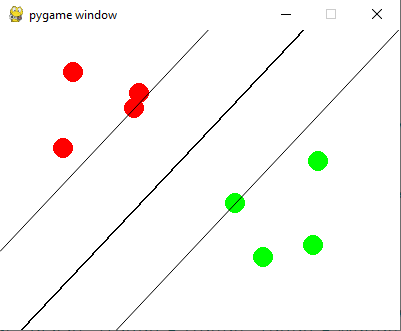